In [21]:
import pandas as pd

In [22]:
path_to_dataset = 'C:/Users/TG/Desktop/WT_lab/Mall_Customers.csv'


In [23]:
df = pd.read_csv(path_to_dataset)

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
missing_values=df.isnull().sum()
print('mission values:', missing_values)

mission values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [48]:
print(df.columns)


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Male_1'],
      dtype='object')


In [50]:
if 'Gender' in df.columns:
    df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)], axis=1)
    df.drop(['Gender'], axis=1, inplace=True)

In [51]:
df



,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male_1
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [54]:
scaler = StandardScaler()

In [55]:
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [56]:
print("Preprocessed Data:\n", df.head())

Preprocessed Data:
    CustomerID       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1 -1.424569           -1.738999               -0.434801   
1           2 -1.281035           -1.738999                1.195704   
2           3 -1.352802           -1.700830               -1.715913   
3           4 -1.137502           -1.700830                1.040418   
4           5 -0.563369           -1.662660               -0.395980   

   Gender_Male_1  
0              1  
1              1  
2              0  
3              0  
4              0  


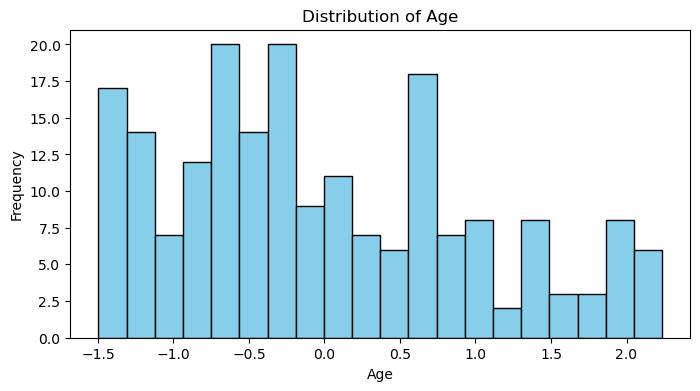

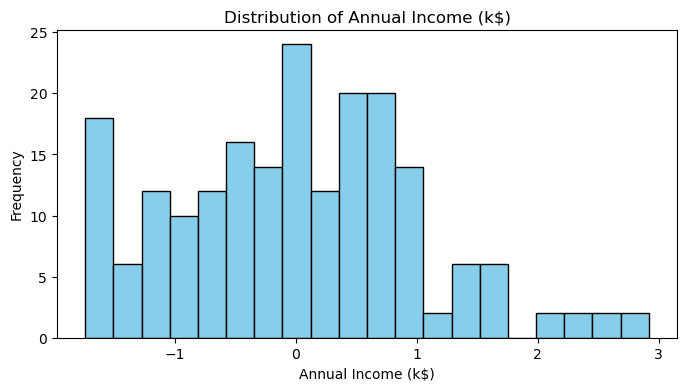

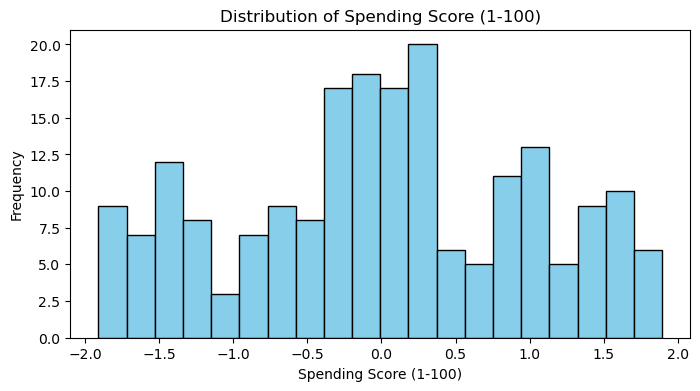

In [57]:
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


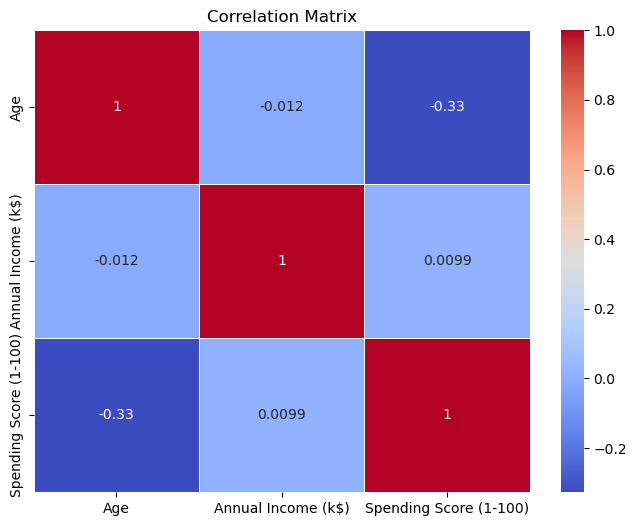

In [58]:
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


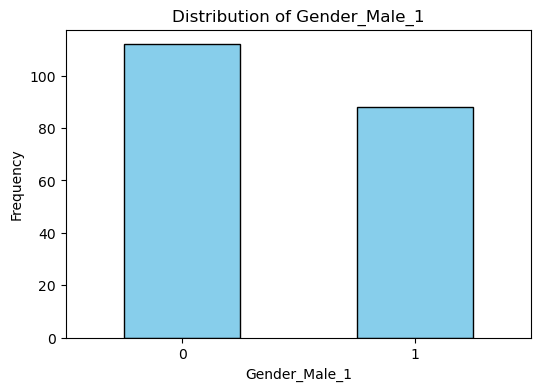

In [60]:
categorical_cols = ['Gender_Male_1']  

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()


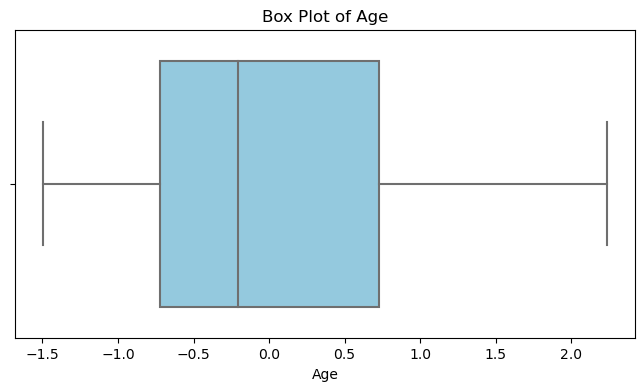

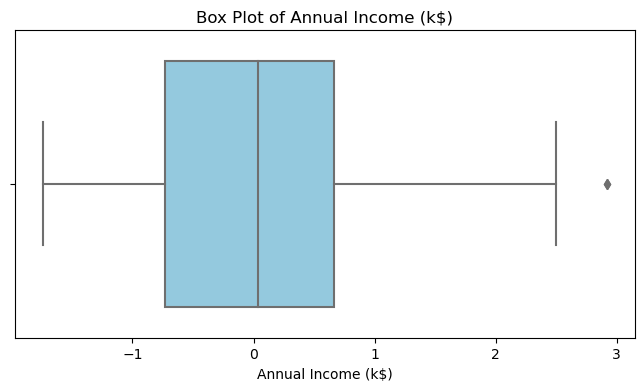

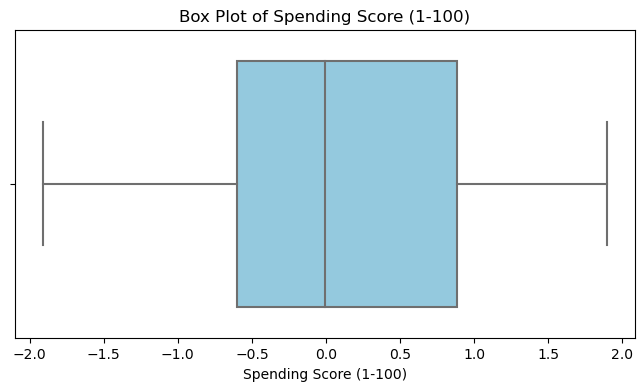

In [61]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [65]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['Age'])
y = df['Age']

model = LinearRegression()
model.fit(X, y)
age_predictions = model.predict(X)



In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Assuming you're using Linear Regression

X = df.drop(columns=['Age'])
y = df['Age']

model = LinearRegression() 
num_features_to_select = 5 

rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

X_rfe = rfe.fit_transform(X, y)

selected_indices = rfe.support_

selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)



Selected Features: Index(['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Male_1'],
      dtype='object')


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)


In [81]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')



Mean Absolute Error: 0.78
Mean Squared Error: 0.90
Root Mean Squared Error: 0.95


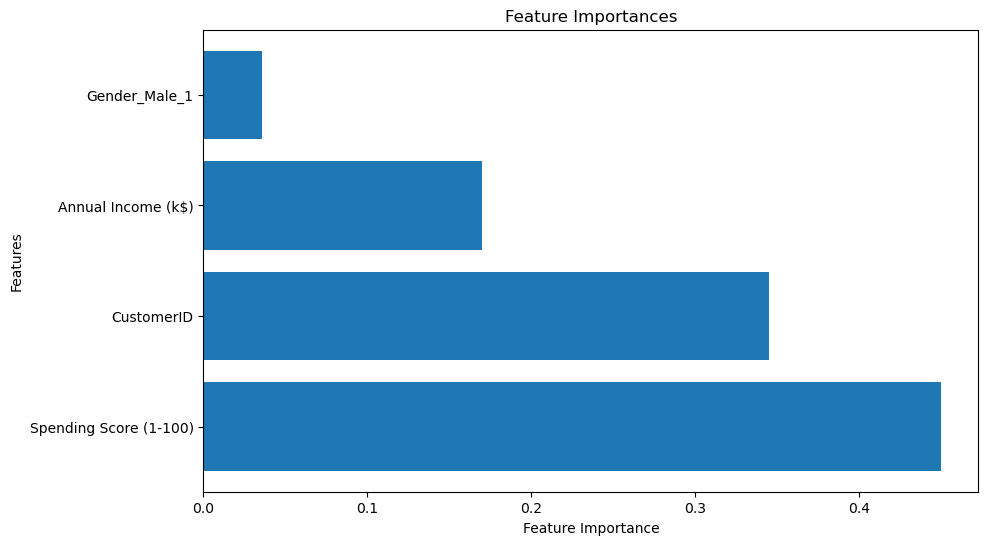

In [82]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Age'])
y = df['Age']
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()


In [84]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest MAE: {mae:.2f}')


Random Forest MAE: 0.34


In [86]:
import pickle
with open('age_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
